In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Opens all the csv files for all the schools

In [3]:
ucsc_files = open('./184_project/UCSC files.csv')
df_ucsc = pd.read_csv(ucsc_files)

uci_files = open('./184_project/UCI/UCI files.csv')
df_uci = pd.read_csv(uci_files)

sdsu_files = open('./184_project/SDSU/SDSU files.csv')
df_sdsu = pd.read_csv(sdsu_files)

chico_files = open('./184_project/CHICO/CHICO files.csv')
df_chico = pd.read_csv(chico_files)

sfsu_files = open('./184_project/SF State/SF_State_Data.csv')
df_sfsu = pd.read_csv(sfsu_files)

harveymud_files = open('./184_project/Harvey_files.csv')
df_harvey = pd.read_csv(harveymud_files)

panoma_files = open('./184_project/Pomona_files.csv')
df_panoma = pd.read_csv(panoma_files)


In [4]:
#Goes through all the schools and cleans up the term to season + year

In [5]:
for row_num, i in enumerate(df_harvey.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_harvey.at[row_num, 'term'] = term_split[0] +' ' + term_split[1]


In [6]:
for row_num, i in enumerate(df_panoma.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_panoma.at[row_num, 'term'] = term_split[0] + ' ' + term_split[1]


In [7]:
for row_num, i in enumerate(df_chico.iloc[:,3]):
    term_split = i.split('2')
    if term_split[0] == 'fa':
        term_split[0] = 'Fall'
        term_split[1] = '2' + term_split[1]
    elif term_split[0] == 'spr':
        term_split[0] = 'Spring'
        term_split[1] = '2' + term_split[1]
    if len(term_split) == 3:
        term_split = [term_split[0], term_split[1] + '2']
    season_year = term_split[0] + ' ' + term_split[1]
    df_chico.at[row_num, 'term'] = season_year.upper()

In [8]:
for row_num, i in enumerate(df_sfsu.iloc[:,1]):
    term_split = i.split(' ')
    season_year = term_split[0] + ' ' + term_split[1]
    df_sfsu.at[row_num, 'term'] = season_year.upper()

for row_num, class_num in enumerate(df_sfsu['class_number']):
    class_split = class_num.split(' ')
    df_sfsu.at[row_num, 'class_number'] = class_split[0] + class_split[1]    

In [9]:
for row_num, i in enumerate(df_sdsu.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[0]) == 1:
        term_split[0] = '200' + term_split[0]
    else:
        term_split[0] = '20' + term_split[0]
    df_sdsu.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [10]:
for row_num, i in enumerate(df_uci.iloc[:,3]):
    term_split = i.split(' ')
    df_uci.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [11]:
for row_num, i in enumerate(df_ucsc.iloc[:, 3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year = term_split[1].split('0')
        new_year = year[0] + '00' + year[1]
        term_split[1] = new_year
    df_ucsc.at[row_num, 'term'] = (term_split[0] + ' ' + term_split[1]).upper()


In [12]:
# Goes through all the data and adds the percentages of class to the end of the dataframe

In [13]:
def add_percentage(self, num_enroll, total_size):
    self['Percentage'] = 0.
    for row_num, i in enumerate(self.iloc[:, num_enroll]):
        try:
            float(self.iloc[row_num, total_size])
        except:
            self.iloc[row_num,total_size] = self.iloc[row_num, total_size].split('W')[0]
        if float(self.iloc[row_num, total_size]) == 0:
            self.iloc[row_num, total_size] = self.iloc[row_num, num_enroll]
        if float(self.iloc[row_num, total_size]) == 0 and float(self.iloc[row_num, num_enroll]) ==0:
            self.iloc[row_num, total_size ] = 1;
        percentage = float(self.iloc[row_num, num_enroll])/float(self.iloc[row_num,total_size])
        if percentage > 1:
            percentage = 1
        if percentage <= 0:
            percentage = None
        self.at[row_num, 'Percentage'] = percentage
    return self

In [14]:
def clean_nan(self):
    self = self.replace(0.,np.NaN)
    self = self.dropna()
    return self

In [15]:
def clean_class_nums(self):
    for row_num,i in enumerate(self.iloc[:,2]):
        cs_classes = i.split(' ')
        self.iloc[row_num,2] = cs_classes[0].strip()
    return self

In [16]:
add_percentage(df_chico, 0, 1)
add_percentage(df_sfsu, 3, 4)
add_percentage(df_ucsc, 0, 1)
add_percentage(df_sdsu, 0, 1)
add_percentage(df_uci, 0, 1)
add_percentage(df_harvey, 0, 1)
add_percentage(df_panoma,0, 1)

col = ['num_people_enrolled', 'total_class_size', 'class_number', 'term', 'Prof Name', 'Percentage', 'Unnamed: 0']
df_sfsu = df_sfsu.loc[:,col]
df_sfsu.drop('Unnamed: 0', axis = 1, inplace = True)
df_sfsu.columns = ['num_people_enrolled', 'total_class_size', 'class_number', 'term' ,'professor', 'Percentage']

df_chico = clean_nan(df_chico)
df_sdsu= clean_nan(df_sdsu)
df_ucsc = clean_nan(df_ucsc)
df_uci = clean_nan(df_uci)
df_sfsu = clean_nan(df_sfsu)
df_panoma = clean_nan(df_panoma)
df_harvey = clean_nan(df_harvey)

df_panoma = clean_class_nums(df_panoma)
df_harvey = clean_class_nums(df_harvey)

In [17]:
# Splits the data into percentages for each term, so it makes it easier to plot

In [18]:
def getPercentages(self, term_location):
    unique_vals = []
    newData = []
    newTerm = []
    for i in self.iloc[:,term_location]:
        if i not in unique_vals:
            unique_vals.append(i)
    newTerm = list(unique_vals)
    for i in newTerm:
        newData.append(self.Percentage[self.term == i])
    return newData, newTerm

In [19]:
# Goes through each term and sorts the term with accordance to the data

In [20]:
def sort_term(term, data):
    to_sort = []
    for i in term:
        if 'FALL' in i:
            split = i.replace('FALL', '')
            split = split + '2'
        if 'SPRING' in i:
            split = i.replace('SPRING', '')
            split = split+'3'
        if 'WINTER' in i:
            split = i.replace('WINTER', '')
            split = split + '1'
        to_sort.append((int(int(split)%1000)))
    _, term, data = zip(*sorted(zip(to_sort, term, data)))
    return term, data

In [21]:
# newData, newTerm = getPercentages(df_ucsc, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [22]:
# newData, newTerm = getPercentages(df_uci, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [23]:
# newData, newTerm = getPercentages(df_sdsu, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [24]:
# newData, newTerm = getPercentages(df_sfsu, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [25]:
# newData, newTerm = getPercentages(df_harvey, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [26]:
# newData, newTerm = getPercentages(df_panoma, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [27]:
def term_to_num(term):
    quant = {'SPRING':.01, 'FALL':.02,  'WINTER':.03}
    df = pd.DataFrame()
    term_split = term.split(' ')
    return quant[term_split[0]] + int(term_split[1])

In [28]:
# new_data, new_term = getPercentages(df_panoma, 3)
# new_term_p, new_data_p = sort_term(newTerm, newData)

# new_data, new_term = getPercentages(df_harvey, 3)
# new_term_harvey, newData_harvey = sort_term(newTerm, newData)

# new_data, new_term = getPercentages(df_uci, 3)
# new_term_uci, new_data_uci = sort_term(newTerm, newData)

# new_data, new_term = getPercentages(df_sfsu, 3)
# new_term_sfsu, new_data_sfsu = sort_term(newTerm, newData)

# new_data, new_term = getPercentages(df_sdsu, 3)
# new_term_sdsu, new_data_sdsu = sort_term(newTerm, newData)

# new_data, new_term = getPercentages(df_ucsc, 3)
# new_term_ucsc, new_data_ucsc = sort_term(newTerm, newData)


In [29]:
df_uci['term_num'] = df_uci['term'].apply(term_to_num)
df_ucsc['term_num'] = df_ucsc['term'].apply(term_to_num)
df_chico['term_num'] = df_chico['term'].apply(term_to_num)
df_sdsu['term_num'] = df_sdsu['term'].apply(term_to_num)
df_harvey['term_num'] = df_harvey['term'].apply(term_to_num)
df_panoma['term_num'] = df_panoma['term'].apply(term_to_num)
df_sfsu['term_num'] = df_sfsu['term'].apply(term_to_num)

df_ucsc = df_ucsc.sort_values(by = ['term_num'])
df_uci = df_uci.sort_values(by = ['term_num'])
df_chico = df_chico.sort_values(by = ['term_num'])
df_sdsu = df_sdsu.sort_values(by = ['term_num'])
df_harvey = df_harvey.sort_values(by = ['term_num'])
df_sfsu = df_sfsu.sort_values(by=['term_num'])


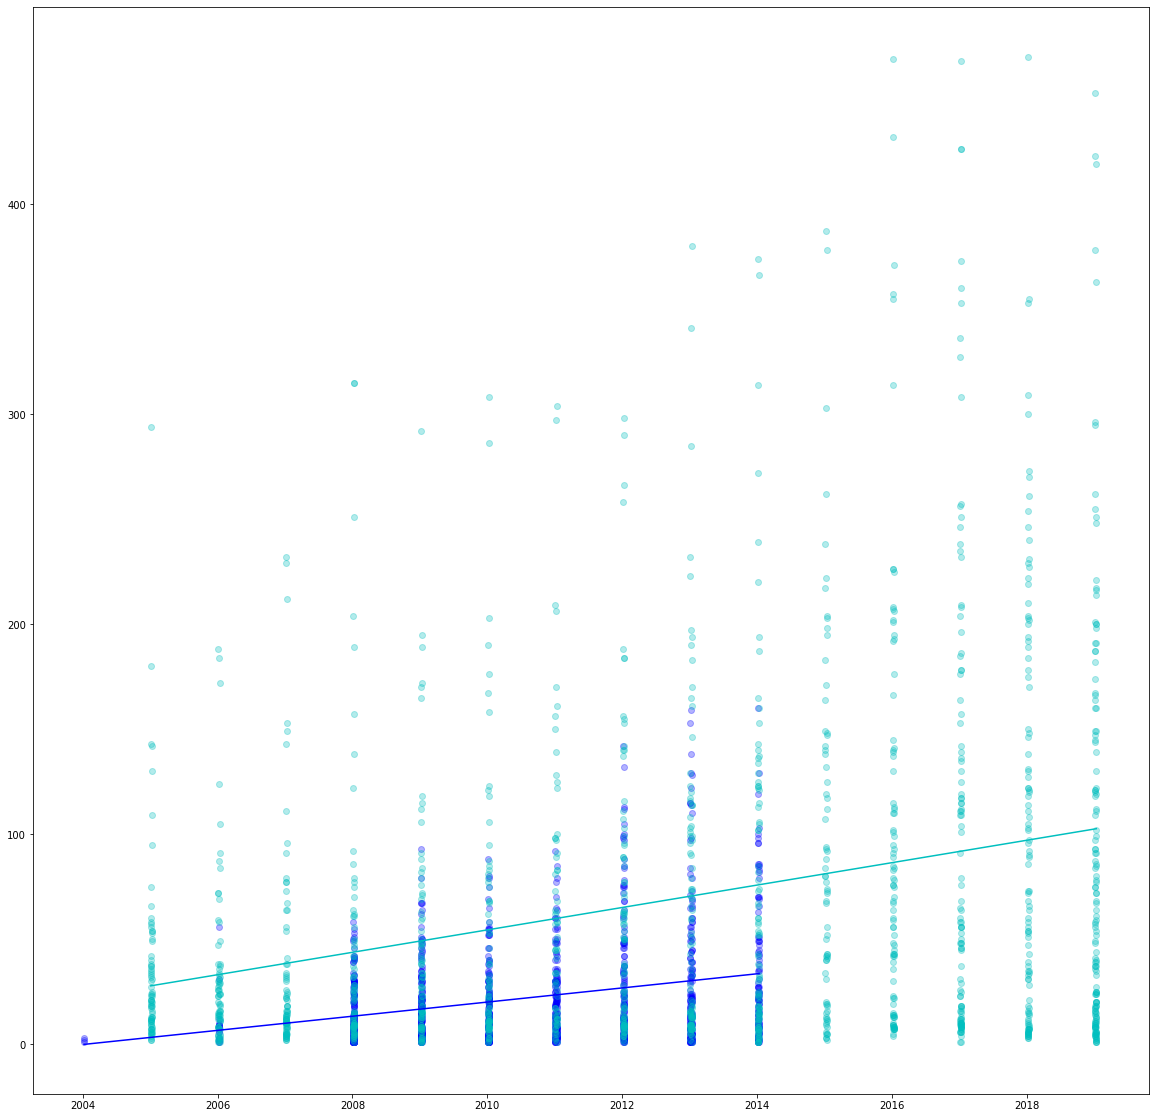

In [30]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

axes.scatter(df_uci['term_num'], df_uci['num_people_enrolled'], alpha = .3, color = 'b')
axes.scatter(df_ucsc['term_num'], df_ucsc['num_people_enrolled'], alpha = .3, color = 'c')

z = np.polyfit(df_uci['term_num'], df_uci['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_uci['term_num'], p(df_uci['term_num']), 'b-')

z = np.polyfit(df_ucsc['term_num'], df_ucsc['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_ucsc['term_num'], p(df_ucsc['term_num']), 'c-')


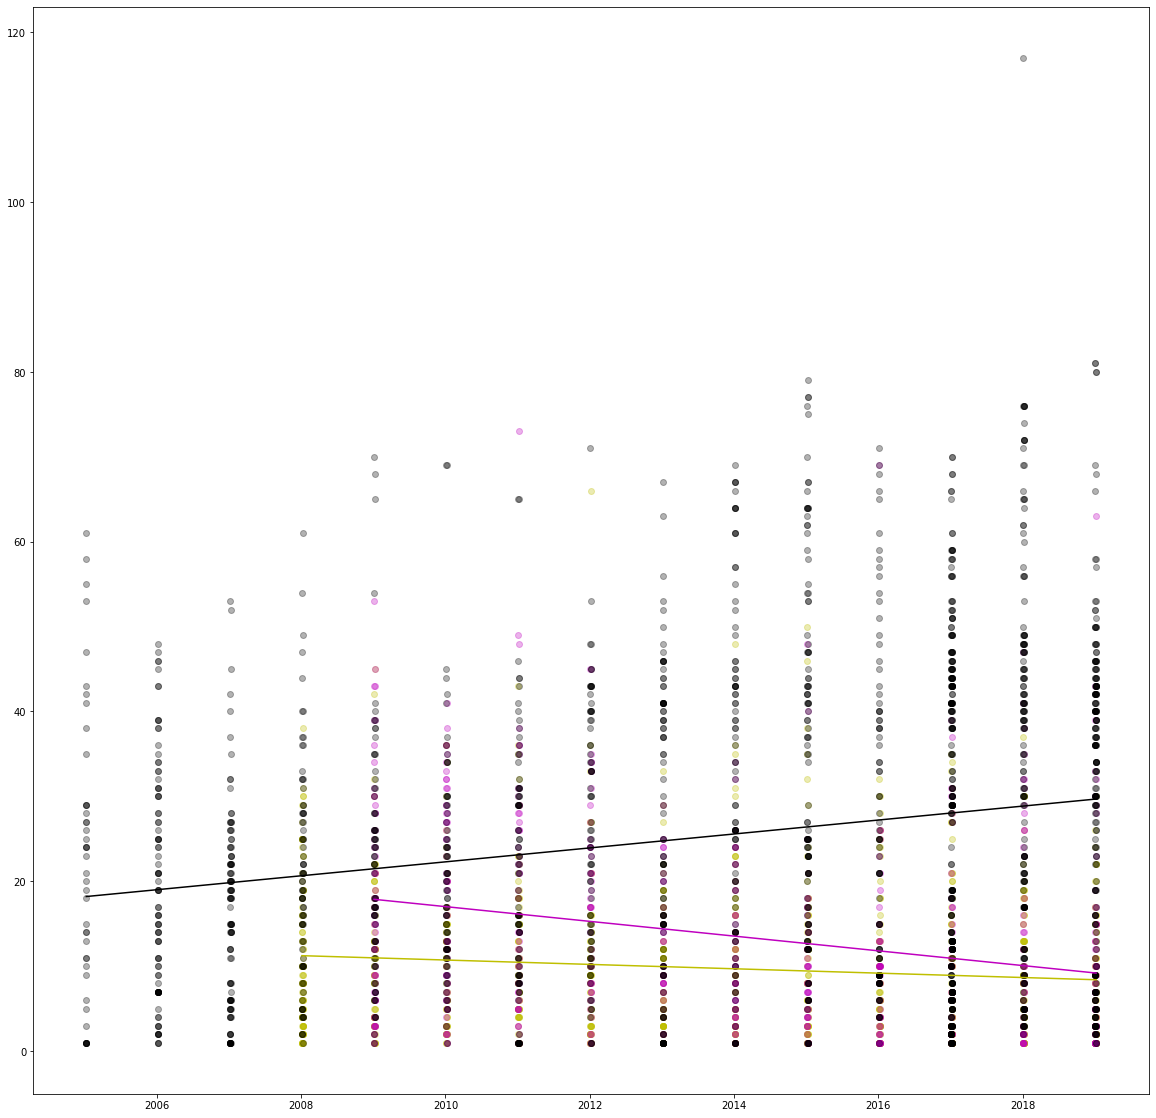

In [31]:
fig, axes = plt.subplots(1,1, figsize=(20,20))
axes.scatter(df_chico['term_num'], df_chico['num_people_enrolled'], alpha = .3, color = 'y')
axes.scatter(df_sdsu['term_num'], df_sdsu['num_people_enrolled'], alpha = .3, color = 'm')
axes.scatter(df_sfsu['term_num'], df_sfsu['num_people_enrolled'], alpha = .3, color = 'k')

z = np.polyfit(df_chico['term_num'], df_chico['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_chico['term_num'], p(df_chico['term_num']), 'y-')

z = np.polyfit(df_sdsu['term_num'], df_sdsu['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_sdsu['term_num'], p(df_sdsu['term_num']), 'm-')


z = np.polyfit(df_sfsu['term_num'], df_sfsu['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_sfsu['term_num'], p(df_sfsu['term_num']), 'k-')


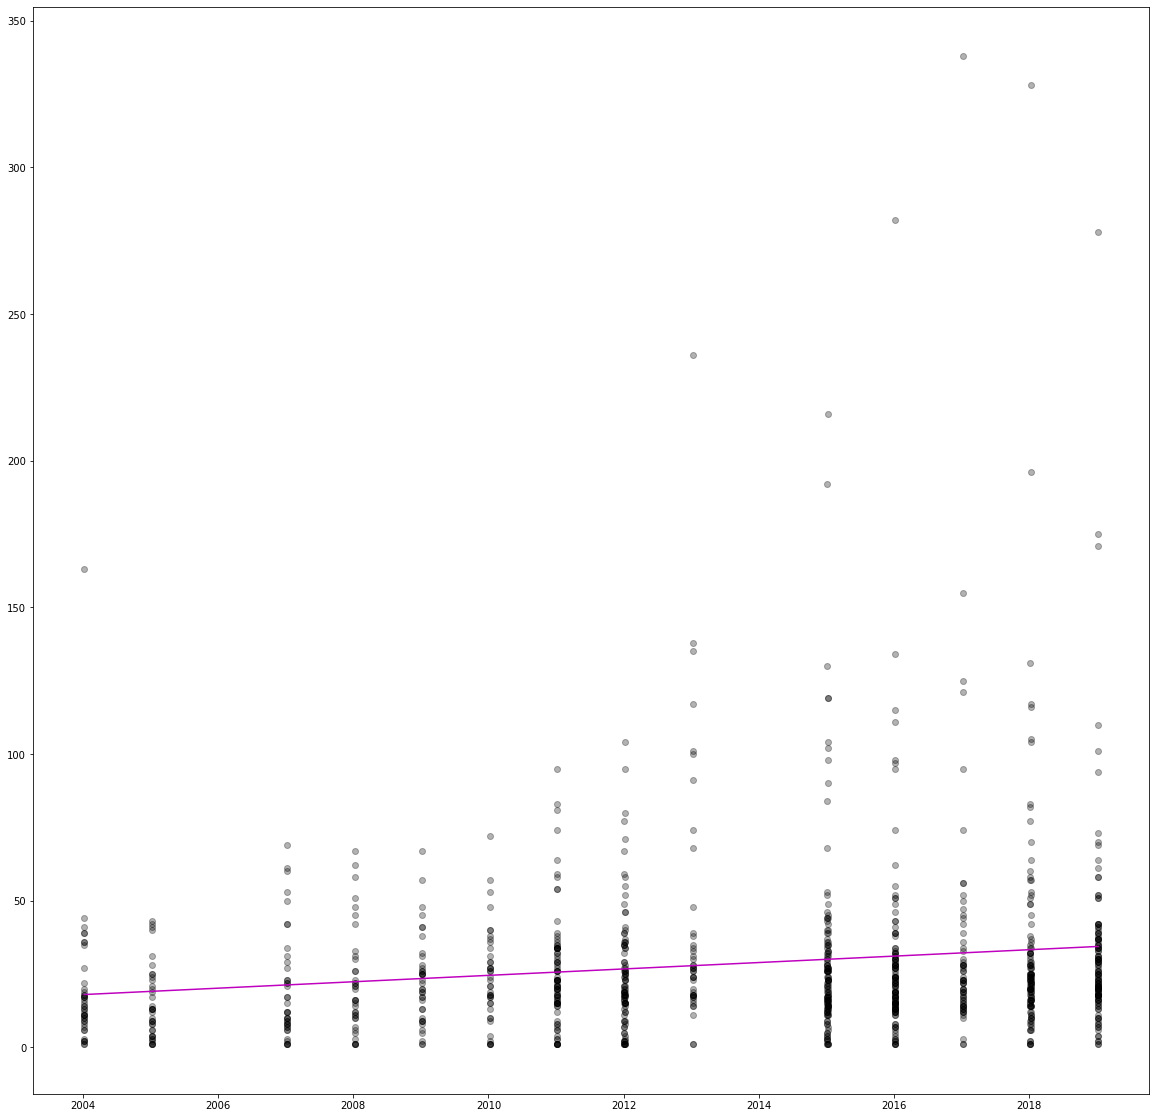

In [32]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

axes.scatter(df_harvey['term_num'], df_harvey['num_people_enrolled'], alpha = .3, color = 'k')

z = np.polyfit(df_harvey['term_num'], df_harvey['num_people_enrolled'], 1)
p = np.poly1d(z)
plt.plot(df_harvey['term_num'], p(df_harvey['term_num']), 'm-')



In [33]:
def find_popular_class(self):
    unique_classes = {}
    difference_list = list()
    for i in self['class_number']:
        if i not in unique_classes:
            unique_classes.update({i: 1})
        else:
            unique_classes.update({i: unique_classes.get(i) + 1})
    class_popular = {}
    for i in unique_classes:
        if unique_classes.get(i) > 7 and unique_classes.get(i) < 15:
            class_popular.update({i:unique_classes.get(i)})
    for i in class_popular:
        this_class = self[self['class_number'] == i]
        percent_lower = 0
        percent_upper = 0
        lower = len(this_class)/2
        top = len(this_class)
        for i in range(int(lower)):
            percent_lower += this_class.iloc[i]['Percentage']
        for i in range(int(lower), int(top)):
            percent_upper += this_class.iloc[i]['Percentage']
        percent_lower /= int(lower)
        percent_upper /= int(top) - int(lower)
        difference = percent_upper - percent_lower
        difference_list.append((difference, this_class))
    difference_list = sorted(difference_list, key = lambda x: x[0], reverse = False)
    
    popular_classes = list()
    for percent, actual_class in difference_list[-5:]:
        popular_classes.append(actual_class)
    return(popular_classes)

#find_popular_class(df_ucsc) #ucsc 181, 116, 122 Computer Security, Databases, software engineering
#find_popular_class(df_sdsu) # 537 - PROGRAMMING FOR GIS, software engineering - 532, 503 Databases
#find_popular_class(df_uci)  #uci 35320 DataMining, intro to data mgmt 34200 (databases), Computer Security, 34350 AI
#find_popular_class(df_chico) #430 software engineering, intro unix 144
#find_popular_class(df_harvey) #neural networks 152, Computer networks 125, Machine Learning
#find_popular_class(df_sfsu) #212 software engineering # 656 Computer Organization # 305 Social and ethical computing,
#Computer eval 641

In [34]:
ucsc_db= df_ucsc[df_ucsc['class_number'] == '180']
sdsu_db = df_sdsu[df_sdsu['class_number'] == 'CS-503']
uci_db = df_uci[df_uci['class_number'] == 34200]
sfsu_db = df_sfsu[df_sfsu['class_number'] == 'CSC675']
harvey_db = df_harvey[df_harvey['class_number'] == 'CSCI133']

In [35]:
ucsc_sec = df_ucsc[df_ucsc['class_number'] == '122']
sdsu_sec = df_sdsu[df_sdsu['class_number'] == 'CS-574']
chico_sec = df_chico[df_chico['class_number'] == '546']
harvey_sec = df_harvey[df_harvey['class_number'] == 'CSCI125']

In [36]:
#34340 UCI AI
uci_ai = df_uci[df_uci['class_number'] == 34340]
#140 UCSC AI
ucsc_ai = df_ucsc[df_ucsc['class_number'] == '140']
#8719 CSC 665 [01] SFSU AI
sfsu_ai = df_sfsu[df_sfsu['class_number'] == 'CSC665']
#CS 151. Artificial Intelligence Harvey Mudd
harvey_ai = df_harvey[df_harvey['class_number'] == 'CSCI151']
#CS-550 SDSU
sdsu_ai = df_sdsu[df_sdsu['class_number'] == 'CS-550']


In [37]:
#software engineering
#ucsc 115
#harvey 121
#chico 430
#sfsu 648
#sdsu 532

In [38]:
#database
#ucsc 180
#harvey 133
#chico 370
#sfsu 675
#uci 34060